[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Anahtar Kelime		Bulunma Sıklğı	Skor
cycle		2		10
reef		1		4
tasarlamaktır		1		13
yürütecek		1		9
reflection		1		10
aim		1		3
çalışmalar		1		10
tablosu		1		7
received		1		8
sonraki		1		7
33		1		2
mckenney		1		8
tasarlanıp		1		10
design		1		6
based		1		5


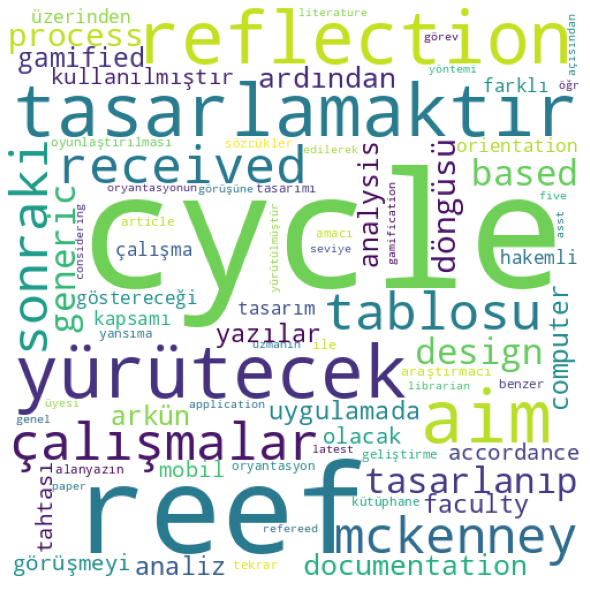

In [ ]:
import PyPDF2
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from snowballstemmer import TurkishStemmer
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Set up NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Set up stop words
stop_words = set(stopwords.words('turkish' and 'english'))

# Set up lemmatizer
lemmatizer = WordNetLemmatizer()

# Set up stemmer
stemmer = TurkishStemmer()

# Set up file name
filename = "/0a7fb1ed-aff6-40f6-97b3-7def4e683eab.pdf"

# Open PDF file
with open(filename, 'rb') as file:
    # Create a PdfFileReader object
    read_file = PyPDF2.PdfReader(file)

    # Extract the text from the first page
    words_string = read_file.pages[0].extract_text()
    # Change text to lower case
    words_string = words_string.lower()

    # Tokenize the text
    words_list = word_tokenize(words_string)

    # Remove duplicates from the list
    words_list = list(set(words_list))

    # Remove stop words and punctuation, and lemmatize and stem the words
    words = [lemmatizer.lemmatize(word) for word in words_list if word not in stop_words and word not in string.punctuation and word.isalnum()]
    
    # Create a Counter object from the words list
    word_counts = Counter(words)

# Print out the 10 most common words with their counts
    print("Anahtar Kelime\t\tBulunma Sıklğı\tSkor")
    for word, count in word_counts.most_common(15):
    # Calculate the score as the product of the word count and length
        score = count * len(word)
        print(f"{word}\t\t{count}\t\t{score}")

kelimeler = ' '
# iterate through the csv file
for val in words:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    kelimeler += " ".join(tokens)+" "

wordcloud = WordCloud(width = 500, height = 500,
                background_color ='white',
                min_font_size = 10).generate(kelimeler)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()
    # Count the frequency of each keyword
    #keyword_freq = Counter(words)

    # Calculate the total number of words in the document
    #total_words = sum(keyword_freq.values())

    # Calculate the keyword score for each keyword
    #keyword_scores = {word: freq/total_words for word, freq in keyword_freq.items()}

    # Sort the keywords by score in descending order
    #sorted_keywords = sorted(keyword_scores.items(), key=lambda x: x[1], reverse=True)

    # Print out the extracted keywords and their scores
    #for keyword, score in sorted_keywords:
    #    print("Anahtar Kelime:", keyword ,"Skor:", str(score))